# An implementation of a bijection of Backelin, West, and Xin

the original paper can be found here: http://www.sciencedirect.com/science/article/pii/S0196885806000789

In [35]:
%matplotlib inline
import itertools
import matplotlib.pyplot as plt
import numpy as np


def findjt(lst,t,k):
    white=findwhite(lst,k)
    ret=[]
    for i in itertools.combinations(white,t):
        if isinstance(i,list(reversed(range(1,t+1)))):
            ret.append(i)
    if len(ret)>0:
        return sorted(ret)[0]
    else:
        return False
def swapjf(lst,t,k):
    jt=findwhite(lst,t,k)
    indexlist=list(map(lst.index,jt))
    ret=[]
    for i in range(len(lst)):
        if i not in indexlist:
            ret.append(lst[i])
        else:
            c=indexlist.index(i)
            if c<len(jt)-1:
                ret.append(jt[c+1])
            else:
                ret.append(jt[0])
    return ret

def genpat(t,k):
    lst=list(reversed(range(1,t+1)))+range(t+1,k+t+1)
    return lst

def genbij2(lst,t,k):  #input=permutation (lst) avoiding [t-1...1,t+1,t+2...t+k+1] output=permutation avoiding [t,t-1,...,1,t+1,t+2...t+k]
    while findwhite(lst,t,k)!=False:
        lst=swapjf(lst,t,k)
    return lst

def from_monotonebij(lst,m,k): #input=permutation (lst) avoiding [1,2,...,m] output=permutation avoiding [k,k-1,...,1,k+1,...,m]
    ret=lst
    for i in range(2,k+1):
        ret=genbij2(ret,i,m-i)
    return ret

def decreasingbwxbij(lst,m,k): #input=permutation avoiding [m,m-1,...1] output = permutation avoiding [m,m-1...k+1,1,2...k]
    ret=from_monotonebij(list(reversed(lst)),m,k)
    return list(reversed(ret))

def isinstance(case,pat):
    test=[(case[a]<case[b])==(pat[a]<pat[b]) for a in range(len(case)) for b in range(a+1,len(case))]
    return all(test)

def containspat(perm,pattern): #test to see if permutation contains pattern
    test=[]
    for i in itertools.combinations(perm,len(pattern)):
        test.append(isinstance(i,pattern))
    return any(test)

def findwhite(lst,t,k):
    ret=[]
    for i in itertools.combinations(lst,t+k):
        if isinstance(i,genpat(t,k)):
            case=i[0:t]
            if case not in ret:
                ret.append(case)
    if len(ret)>0:
        return list(sorted(ret,key=lambda x: x[0]))[0]
    else: return False


def lrmax(lst): #find the left to right maxima of a permutation
    a=[lst[0]]
    for i in range(1,len(lst)):
        if lst[i]>a[len(a)-1]:
            a.append(lst[i])
    return a

In [98]:
p=gen_perm(50,4) #a "random"-ish permutation of length 50 avoiding 4321


In [48]:
pval=p.values()
p42 = decreasingbwxbij(pval,4,2) #the bijection provides a new permutation avoiding 4312


In [90]:
p43=decreasingbwxbij(pval,4,3) #the bijection provides a new permutation avoiding 4123

In [104]:
print containspat(p,[4,3,2,1]) #false: by construction p avoids 4321
print containspat(p42,[4,3,1,2]) #false: p42 is the image of p under the bijection, which maps p to a permutation avoiding 4312 
print containspat(p42,[4,3,2,1]) # true: note that the bijection can reintroduce 4321 patterns, that p originally avoided
print containspat(p43,[4,1,2,3]) #false: by construction p43 avoids only 4123
print containspat(p43,[4,3,1,2]) #true: for same reasons as previous case

False
False
True
False
True


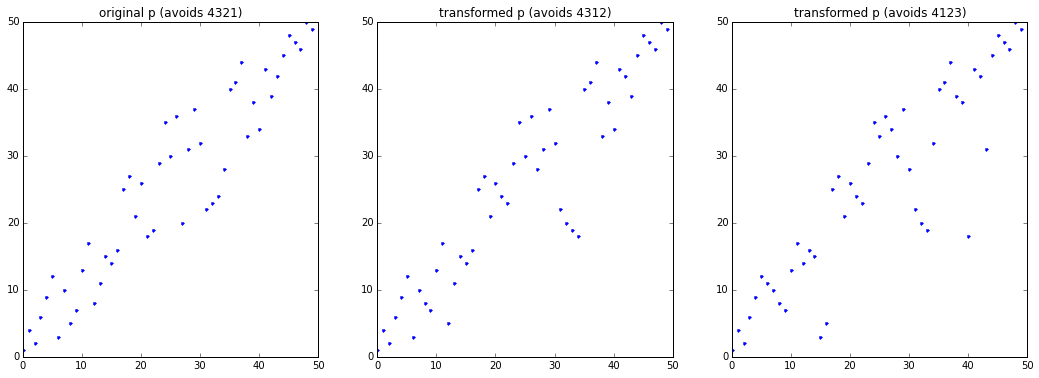

In [117]:
from pylab import rcParams
fig, ax = plt.subplots(1,3)
ax[0].plot(range(len(p42)),pval,'b.')
ax[0].set_title("original p (avoids 4321)")
ax[1].plot(range(len(p42)),p42,'b.')
ax[1].set_title("transformed p (avoids 4312)")
ax[2].plot(range(len(p42)),p43,'b.')
ax[2].set_title("transformed p (avoids 4123)")
rcParams['figure.figsize'] = 18, 6
plt.show()

In [128]:
lr_max_of_p=lrmax(pval) #find the left to right max of the original permutation p
colorlist=['red']
for i in range(1,50):
    if pval[i] in lr_max_of_p:
        colorlist.append('red')
    else:
        colorlist.append('blue')

Let's plot the same graph again, this time, we'll color the left to right maxima in red.  Note that at each step, the bijection preserves the left to right maxima.

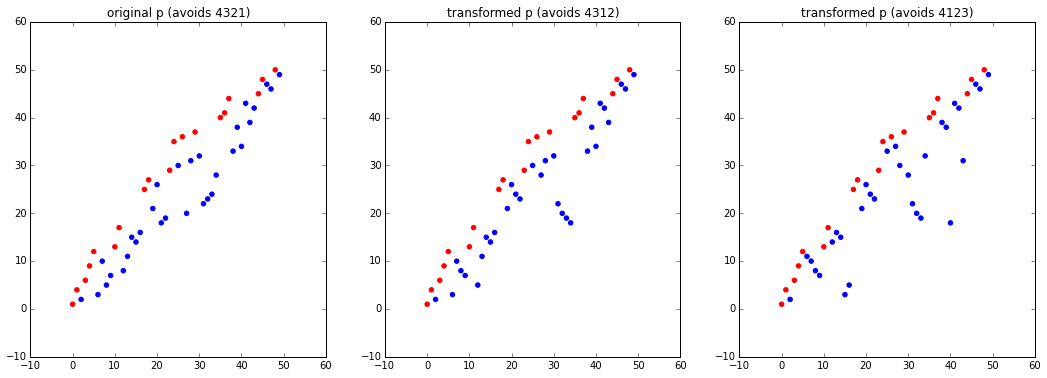

In [130]:
fig, ax = plt.subplots(1,3)
ax[0].scatter(range(len(p42)),pval,color=colorlist)
ax[0].set_title("original p (avoids 4321)")
ax[1].scatter(range(len(p42)),p42,color=colorlist)
ax[1].set_title("transformed p (avoids 4312)")
ax[2].scatter(range(len(p42)),p43,color=colorlist)
ax[2].set_title("transformed p (avoids 4123)")
rcParams['figure.figsize'] = 18, 6
plt.show()

In [127]:
lrmax(pval)

[1, 4, 6, 9, 12, 13, 17, 25, 27, 29, 35, 36, 37, 40, 41, 44, 45, 48, 50]